## Problem Statement:
Study payroll datasets (salary, attendance, leaves, tax slabs)
Build models for:
Salary prediction based on role & experience
Attrition prediction (who might leave)
Anomaly detection (salary errors, fraud detection)
Feature engineering for payroll data
Exploratory Data Analysis (EDA)
Create simple ML pipelines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("payroll_dataset.csv")
df.head()

,Employee_ID,Age,Department,Role,Experience_Years,Attendance_Percentage,Paid_Leaves,Sick_Leaves,Unpaid_Leaves,Basic_Salary,Allowances,Deductions,Tax_Slab,Tax_Amount,Net_Salary,Attrition
0,1001,50,Finance,Data Analyst,13,93,15,9,1,78740,18905,14140,Low,3937.0,79568,No
1,1002,36,IT,Manager,5,94,9,9,0,79309,15070,12780,High,15861.8,65737,No
2,1003,29,Operations,Manager,4,91,14,1,5,44984,14232,2537,Low,2249.2,54429,No
3,1004,42,Finance,Accountant,10,83,6,1,2,68411,24168,14368,High,13682.2,64528,No
4,1005,40,Finance,Software Engineer,3,73,10,9,6,23286,6583,4137,Medium,2328.6,23403,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            300 non-null    int64  
 1   Age                    300 non-null    int64  
 2   Department             300 non-null    object 
 3   Role                   300 non-null    object 
 4   Experience_Years       300 non-null    int64  
 5   Attendance_Percentage  300 non-null    int64  
 6   Paid_Leaves            300 non-null    int64  
 7   Sick_Leaves            300 non-null    int64  
 8   Unpaid_Leaves          300 non-null    int64  
 9   Basic_Salary           300 non-null    int64  
 10  Allowances             300 non-null    int64  
 11  Deductions             300 non-null    int64  
 12  Tax_Slab               300 non-null    object 
 13  Tax_Amount             300 non-null    float64
 14  Net_Salary             300 non-null    int64  
 15  Attrit

In [4]:
df.describe()

,Employee_ID,Age,Experience_Years,Attendance_Percentage,Paid_Leaves,Sick_Leaves,Unpaid_Leaves,Basic_Salary,Allowances,Deductions,Tax_Amount,Net_Salary
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1150.500000,38.830000,11.493333,80.280000,12.236667,4.416667,3.390000,49087.420000,13541.960000,8092.713333,5531.611167,49004.583333
std,86.746758,10.108828,7.404461,11.499961,4.472209,2.873542,2.286627,17923.530389,6601.436541,4062.591730,3791.505661,18782.929679
min,1001.000000,22.000000,0.000000,60.000000,5.000000,0.000000,0.000000,15163.000000,2161.000000,1007.000000,914.600000,9981.000000
25%,1075.750000,29.000000,5.000000,70.000000,8.000000,2.000000,1.000000,37312.750000,7581.000000,4810.000000,2745.212500,34373.000000
50%,1150.500000,40.000000,11.000000,80.500000,12.500000,4.000000,3.000000,48274.000000,13903.500000,8047.500000,4200.050000,47767.500000
75%,1225.250000,47.000000,18.000000,91.000000,16.000000,7.000000,5.000000,64862.500000,19018.750000,11483.250000,7658.350000,63192.500000
max,1300.000000,54.000000,24.000000,99.000000,19.000000,9.000000,7.000000,79978.000000,24963.000000,14970.000000,15861.800000,89205.000000


In [5]:
#Feature Engineering:
df["Total_Leaves"] = df["Paid_Leaves"] + df["Sick_Leaves"] + df["Unpaid_Leaves"]
df["Leave_Ratio"] = df["Total_Leaves"] / 30
df["Salary_Per_Experience"] = df["Net_Salary"] / (df["Experience_Years"] + 1)

In [6]:
df.describe()

,Employee_ID,Age,Experience_Years,Attendance_Percentage,Paid_Leaves,Sick_Leaves,Unpaid_Leaves,Basic_Salary,Allowances,Deductions,Tax_Amount,Net_Salary,Total_Leaves,Leave_Ratio,Salary_Per_Experience
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1150.500000,38.830000,11.493333,80.280000,12.236667,4.416667,3.390000,49087.420000,13541.960000,8092.713333,5531.611167,49004.583333,20.043333,0.668111,8168.750571
std,86.746758,10.108828,7.404461,11.499961,4.472209,2.873542,2.286627,17923.530389,6601.436541,4062.591730,3791.505661,18782.929679,6.134620,0.204487,11167.848122
min,1001.000000,22.000000,0.000000,60.000000,5.000000,0.000000,0.000000,15163.000000,2161.000000,1007.000000,914.600000,9981.000000,6.000000,0.200000,568.125000
25%,1075.750000,29.000000,5.000000,70.000000,8.000000,2.000000,1.000000,37312.750000,7581.000000,4810.000000,2745.212500,34373.000000,15.000000,0.500000,2416.002508
50%,1150.500000,40.000000,11.000000,80.500000,12.500000,4.000000,3.000000,48274.000000,13903.500000,8047.500000,4200.050000,47767.500000,20.000000,0.666667,4023.531373
75%,1225.250000,47.000000,18.000000,91.000000,16.000000,7.000000,5.000000,64862.500000,19018.750000,11483.250000,7658.350000,63192.500000,24.250000,0.808333,8654.312500
max,1300.000000,54.000000,24.000000,99.000000,19.000000,9.000000,7.000000,79978.000000,24963.000000,14970.000000,15861.800000,89205.000000,33.000000,1.100000,69667.000000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    mean_absolute_error, r2_score
)

In [8]:
le = LabelEncoder()

for col in ["Department", "Role", "Tax_Slab", "Attrition"]:
    df[col] = le.fit_transform(df[col])

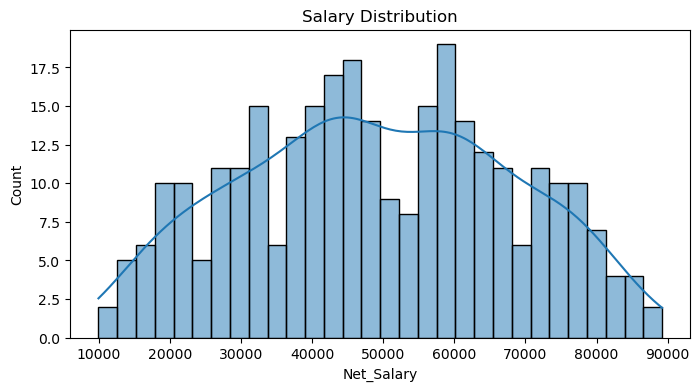

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df["Net_Salary"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

#### Observations:
The salary distribution is fairly spread out, ranging roughly from 10,000 to 90,000, indicating a wide variation in net salaries.

Most employees fall in the mid-range, with a higher concentration between about 40,000 and 65,000, suggesting this is the dominant salary band.

The curve shows a near-normal distribution with slight right skewness, meaning fewer employees earn very high salaries compared to mid-level earners.

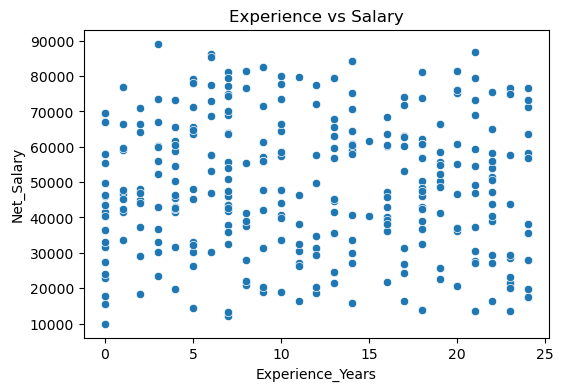

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Experience_Years", y="Net_Salary", data=df)
plt.title("Experience vs Salary")
plt.show()

#### Observations:
The scatter plot shows a weak positive relationship between experience and net salary, indicating that salaries tend to increase with experience but not in a strictly linear manner.

There is a wide spread of salaries at almost every experience level, suggesting that factors other than experience (such as role or performance) strongly influence pay.

Employees with both low and high experience can be found across similar salary ranges, highlighting pay variability within experience groups.

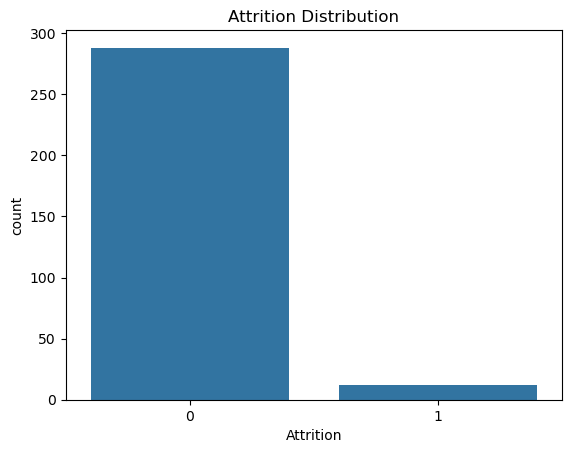

In [11]:
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

#### Observations:
The attrition distribution is highly imbalanced, with a large majority of employees not leaving the organization (Attrition = 0).

Only a small proportion of employees have attrited (Attrition = 1), indicating overall low employee turnover.

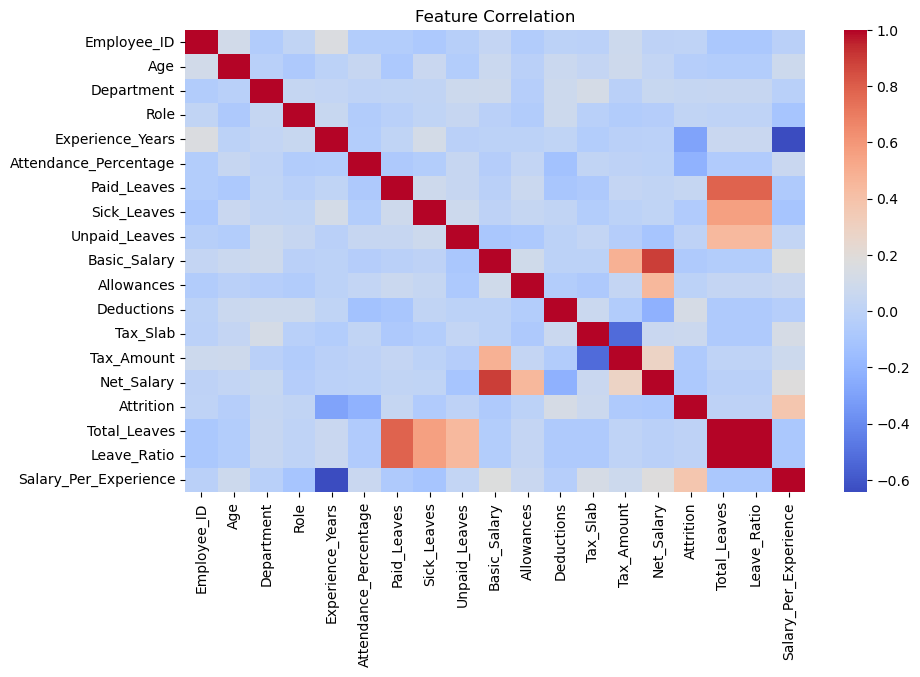

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [13]:
#Train-Test Split:
X = df.drop("Net_Salary", axis=1)
y = df["Net_Salary"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest

In [17]:
#Model (Regression):
salary_model = RandomForestRegressor(n_estimators=200, random_state=42)
salary_model.fit(X_train, y_train)

salary_pred = salary_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, salary_pred))
print("R2 Score:", r2_score(y_test, salary_pred))

MAE: 3815.565583333334
R2 Score: 0.9249553076428518


#### Observation
The model shows strong predictive performance, with a high R² score (~0.925) indicating it explains about 92.5% of the variance in the target variable.
The MAE of ~3816 suggests the average prediction error is relatively low compared to the overall scale, indicating accurate and reliable predictions.

In [18]:
#Model (Classification)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
attrition_model = LogisticRegression(max_iter=1000)
attrition_model.fit(X_train, y_train)

attrition_pred = attrition_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, attrition_pred))
print(classification_report(y_test, attrition_pred))

Accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.75      0.86         4

    accuracy                           0.98        60
   macro avg       0.99      0.88      0.92        60
weighted avg       0.98      0.98      0.98        60



C:\Users\sakth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Observations:
The model achieves very high accuracy (98.3%), indicating excellent overall classification performance.
It performs extremely well on class 0, but the recall for class 1 is lower (0.75), suggesting some minority-class instances are missed despite perfect precision.

### Anamoly Detection

In [20]:
iso = IsolationForest(contamination=0.03, random_state=42)

df["Anomaly"] = iso.fit_predict(
    df[["Net_Salary", "Allowances", "Deductions"]])

In [21]:
df[df["Anomaly"] == -1].head()

,Employee_ID,Age,Department,Role,Experience_Years,Attendance_Percentage,Paid_Leaves,Sick_Leaves,Unpaid_Leaves,Basic_Salary,Allowances,Deductions,Tax_Slab,Tax_Amount,Net_Salary,Attrition,Total_Leaves,Leave_Ratio,Salary_Per_Experience,Anomaly
102,1103,25,3,0,6,98,8,5,6,72022,19508,1687,1,3601.10,86241,0,19,0.633333,12320.142857,-1
117,1118,51,2,1,21,85,15,4,2,76949,23350,9766,1,3847.45,86685,0,21,0.700000,3940.227273,-1
142,1143,49,0,2,9,78,6,0,3,62076,24738,1226,1,3103.80,82484,0,9,0.300000,8248.400000,-1
158,1159,27,3,4,7,85,6,4,1,25749,3169,14269,2,2574.90,12074,0,11,0.366667,1509.250000,-1
230,1231,51,2,4,17,77,16,5,4,26280,2162,1392,2,2628.00,24422,0,25,0.833333,1356.777778,-1


In [22]:
#Pipeline:
from sklearn.pipeline import Pipeline

In [23]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

pipe_pred = pipeline.predict(X_test)
print("Pipeline Accuracy:", accuracy_score(y_test, pipe_pred))

Pipeline Accuracy: 0.95


The pipeline achieves an accuracy of 95%, indicating strong and consistent model performance with reliable predictions on unseen data.

### The things AI add to Payroll are:
Predictive salary planning,Early attrition detection,Automated payroll audits,Cost optimization